In [19]:
#Import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file built by final2020
base_path= "Output/denue_2020.csv"
denue_df = pd.read_csv(base_path)
denue_df.head()

,codigo_act,nombre_act,cve_ent,entidad
0,212311,Minería de piedra caliza,1,AGUASCALIENTES
1,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES
2,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES
3,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES
4,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES


In [3]:
# Creates a new column with the general actvity code
denue_df["codigo_act"] = denue_df["codigo_act"].astype(str)
denue_df["CODIGO"] = denue_df["codigo_act"].str[:2]
denue_df.columns = ["COD_ACT","NOMBRE_ACT", "CVE_ENT","ENTIDAD","CODIGO"]
denue_df.head()

,COD_ACT,NOMBRE_ACT,CVE_ENT,ENTIDAD,CODIGO
0,212311,Minería de piedra caliza,1,AGUASCALIENTES,21
1,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21
2,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21
3,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21
4,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21


In [4]:
# Creates a code dataframe to clean the "CODIGO" column
code = np.array((denue_df["CODIGO"]).unique())
new_code = code.copy()
new_code[3]= "31-33"
new_code[4]= "31-33"
new_code[5]= "31-33"
new_code[8]= "48-49"
new_code[9]= "48-49"

code_df = pd.DataFrame({
    "CODIGO": code,
    "NEW_CODE": new_code
})

code_df.head()

,CODIGO,NEW_CODE
0,21,21
1,22,22
2,23,23
3,31,31-33
4,32,31-33


In [5]:
# Includes the new code column in the denue_df datafra,e
denue_df = pd.merge(denue_df, code_df, on="CODIGO")
denue_df.head()

,COD_ACT,NOMBRE_ACT,CVE_ENT,ENTIDAD,CODIGO,NEW_CODE
0,212311,Minería de piedra caliza,1,AGUASCALIENTES,21,21
1,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21,21
2,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21,21
3,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21,21
4,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21,21


In [6]:
# Formats the columns of the denue_df
denue_df = denue_df[["CVE_ENT","ENTIDAD","NEW_CODE","COD_ACT","NOMBRE_ACT"]]
denue_df.columns = ["CVE_ENT","ENTIDAD","CODIGO","COD_ACT","NOMBRE_ACT"]
denue_df.head()

,CVE_ENT,ENTIDAD,CODIGO,COD_ACT,NOMBRE_ACT
0,1,AGUASCALIENTES,21,212311,Minería de piedra caliza
1,1,AGUASCALIENTES,21,212321,Minería de arena y grava para la construcción
2,1,AGUASCALIENTES,21,212321,Minería de arena y grava para la construcción
3,1,AGUASCALIENTES,21,212321,Minería de arena y grava para la construcción
4,1,AGUASCALIENTES,21,212321,Minería de arena y grava para la construcción


In [7]:
# Counts the economic units per state and activity code
final_df = denue_df.groupby(["CVE_ENT","ENTIDAD", "CODIGO"])\
            .agg({"CODIGO": "count"})\
            .rename(columns = {"CODIGO": "Unidades_Economicas"})

final_df = final_df.reset_index()
final_df.head()

,CVE_ENT,ENTIDAD,CODIGO,Unidades_Economicas
0,1,AGUASCALIENTES,21,19
1,1,AGUASCALIENTES,22,69
2,1,AGUASCALIENTES,23,535
3,1,AGUASCALIENTES,31-33,5877
4,1,AGUASCALIENTES,43,2307


In [ ]:
## DENUE 2019

In [8]:
# Get the denue information from 2019

# Read the CSV file built by final2019
base_path= "Output/denue_2019.csv"
denue_df2 = pd.read_csv(base_path)
denue_df2.head()

,codigo_act,nombre_act,cve_ent,entidad
0,212319,Minería de otras piedras dimensionadas,1,AGUASCALIENTES
1,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES
2,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES
3,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES
4,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES


In [9]:
# Create a new column with the general actvity code
denue_df2["codigo_act"] = denue_df2["codigo_act"].astype(str)
denue_df2["CODIGO"] = denue_df2["codigo_act"].str[:2]
denue_df2.columns = ["COD_ACT","NOMBRE_ACT", "CVE_ENT","ENTIDAD","CODIGO"]
denue_df2.head()

,COD_ACT,NOMBRE_ACT,CVE_ENT,ENTIDAD,CODIGO
0,212319,Minería de otras piedras dimensionadas,1,AGUASCALIENTES,21
1,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21
2,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21
3,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21
4,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21


In [10]:
# Include the new code column in the denue_df datafra,e
denue_df2 = pd.merge(denue_df2, code_df, on="CODIGO")
denue_df2.head()

,COD_ACT,NOMBRE_ACT,CVE_ENT,ENTIDAD,CODIGO,NEW_CODE
0,212319,Minería de otras piedras dimensionadas,1,AGUASCALIENTES,21,21
1,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21,21
2,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21,21
3,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21,21
4,212321,Minería de arena y grava para la construcción,1,AGUASCALIENTES,21,21


In [11]:
# Format the columns of the denue_df
denue_df2 = denue_df2[["CVE_ENT","ENTIDAD","NEW_CODE","COD_ACT","NOMBRE_ACT"]]
denue_df2.columns = ["CVE_ENT","ENTIDAD","CODIGO","COD_ACT","NOMBRE_ACT"]
denue_df2.head()

,CVE_ENT,ENTIDAD,CODIGO,COD_ACT,NOMBRE_ACT
0,1,AGUASCALIENTES,21,212319,Minería de otras piedras dimensionadas
1,1,AGUASCALIENTES,21,212321,Minería de arena y grava para la construcción
2,1,AGUASCALIENTES,21,212321,Minería de arena y grava para la construcción
3,1,AGUASCALIENTES,21,212321,Minería de arena y grava para la construcción
4,1,AGUASCALIENTES,21,212321,Minería de arena y grava para la construcción


In [12]:
# Counts the economic units per state and activity code
denue_df2 = denue_df2.groupby(["CVE_ENT","ENTIDAD", "CODIGO"])\
            .agg({"CODIGO": "count"})\
            .rename(columns = {"CODIGO": "Unidades_Economicas"})
denue_df2 = denue_df2.reset_index()
denue_df2.head()

,CVE_ENT,ENTIDAD,CODIGO,Unidades_Economicas
0,1,AGUASCALIENTES,21,14
1,1,AGUASCALIENTES,22,54
2,1,AGUASCALIENTES,23,498
3,1,AGUASCALIENTES,31-33,5834
4,1,AGUASCALIENTES,43,2243


In [13]:
# Merge the denue information from 2019 to 2020
merge_df = pd.merge(final_df, denue_df2, on=["CVE_ENT","ENTIDAD","CODIGO"])
merge_df.head()

,CVE_ENT,ENTIDAD,CODIGO,Unidades_Economicas_x,Unidades_Economicas_y
0,1,AGUASCALIENTES,21,19,14
1,1,AGUASCALIENTES,22,69,54
2,1,AGUASCALIENTES,23,535,498
3,1,AGUASCALIENTES,31-33,5877,5834
4,1,AGUASCALIENTES,43,2307,2243


In [14]:
# Rearrange columns
merge_df.columns = [["CVE_ENT","ENTIDAD", "CODIGO","UNI_ECON2020","UNI_ECON2019"]]
merge_df.head()

#Export the dataframe to a csv file
csv_path= "Output/merge.csv"
merge_df.to_csv(csv_path,index=False)

In [ ]:
## Summary Statistics

In [15]:
# Get the general PIB information to include this information in the final_df dataframe
base_path= "Output/pib.csv"
pib_df = pd.read_csv(base_path)
pib_df.head()

,CODIGO,Concepto,2019 - 9 Meses,2020 - 9 Meses,DELTA PIB %
0,11,"11 - Agricultura, cría y explotación de animal...",560500.805,565151.496,0.829739
1,21,21 - Minería,857631.916,850685.271,-0.809980
2,22,"22 - Generación, transmisión y distribución de...",286079.166,270881.436,-5.312421
3,23,23 - Construcción,1235196.591,993075.226,-19.601849
4,31-33,31-33 - Industrias manufactureras,2976183.401,2585728.965,-13.119300


In [16]:
# Merge the general PIB info with the economic units info
base_path= "Output/merge.csv"
merge_df2 = pd.read_csv(base_path)

In [17]:
# Merge the general PIB info with the economic units info
merge_df2["CODIGO"] = merge_df2["CODIGO"].astype(str)
pib_df["CODIGO"] = pib_df["CODIGO"].astype(str)

merge_df2 = pd.merge(merge_df2, pib_df, on="CODIGO")
merge_df2.head()

,CVE_ENT,ENTIDAD,CODIGO,UNI_ECON2020,UNI_ECON2019,Concepto,2019 - 9 Meses,2020 - 9 Meses,DELTA PIB %
0,1,AGUASCALIENTES,21,19,14,21 - Minería,857631.916,850685.271,-0.80998
1,2,BAJA CALIFORNIA,21,53,42,21 - Minería,857631.916,850685.271,-0.80998
2,3,BAJA CALIFORNIA SUR,21,40,27,21 - Minería,857631.916,850685.271,-0.80998
3,4,CAMPECHE,21,30,16,21 - Minería,857631.916,850685.271,-0.80998
4,5,COAHUILA DE ZARAGOZA,21,170,142,21 - Minería,857631.916,850685.271,-0.80998


In [34]:
# Read the CSV files

pib_df = pd.read_csv("Output/pib.csv")
code_df = pd.read_csv("Resources/code.csv")
pib_df = pd.merge(pib_df, code_df, on="CODIGO")
pib_df.head()

,CODIGO,Concepto_x,2019 - 9 Meses,2020 - 9 Meses,DELTA PIB %,Concepto_y
0,11,"11 - Agricultura, cría y explotación de animal...",560500.805,565151.496,0.829739,"Agricultura, ganaderia y pesca"
1,21,21 - Minería,857631.916,850685.271,-0.809980,Mineria
2,22,"22 - Generación, transmisión y distribución de...",286079.166,270881.436,-5.312421,"Electricidad, Agua y Gas"
3,23,23 - Construcción,1235196.591,993075.226,-19.601849,Construccion
4,31-33,31-33 - Industrias manufactureras,2976183.401,2585728.965,-13.119300,Industrias Manufactureras


In [35]:
pib_df = pib_df[["CODIGO","Concepto_y", "DELTA PIB %"]]
pib_df.columns = ["CODIGO", "CONCEPTO", "DELTA PIB %"]
pib_df.head()

,CODIGO,CONCEPTO,DELTA PIB %
0,11,"Agricultura, ganaderia y pesca",0.829739
1,21,Mineria,-0.809980
2,22,"Electricidad, Agua y Gas",-5.312421
3,23,Construccion,-19.601849
4,31-33,Industrias Manufactureras,-13.119300


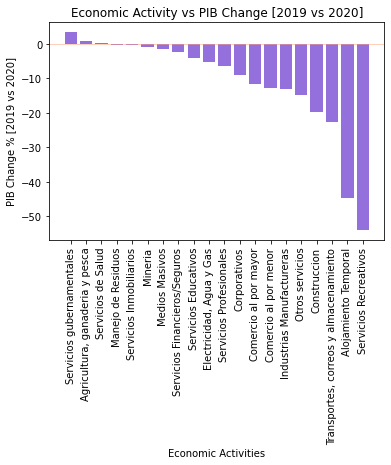

In [41]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
pib_df.sort_values("DELTA PIB %", ascending = False, inplace = True)
plt.bar(pib_df["CONCEPTO"], pib_df["DELTA PIB %"], color = "mediumpurple", label ="DELTA PIB % 2019 vs 2020")
plt.xticks(rotation = 90)
plt.title("Economic Activity vs PIB Change [2019 vs 2020]")
plt.ylabel("PIB Change % [2019 vs 2020]")
plt.xlabel("Economic Activities")
plt.axhline(y=0, color = "lightsalmon", linewidth = 0.5)
plt.savefig("Output/2020.png", bbox_inches="tight")
plt.show()
